According to UN World Drug Report of 2021, drugs like Cannabis and Opiods` use are on the increase and only a few of the young people see it as being harmful.

These practice results into drug abuse/misuse and thereby leading to grave consequences such as addiction, intoxication and later death.

Looking at a data reporting about accidental death due to drug abuse/misuse between 2012 and 2017 in Connecticut. Can we say the abusers/misusers do not understand the effect/severity of their actions, as they might not be able to make it to the hospital before they die in the case of a drug intoxication?

If they are able to arrive at the hospital on time in the case of an intoxication, there are chances of survival. Is this abuse/misuse peculiar to a particular gender and age group?  What age group is the most affected by this practice?

Importing of the Libraries to be utilized


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab


In [ ]:
ls

 AB_NYC_2019.csv
'Accidental_Drug_Related_Deaths__2012-2017 (1).csv'
'Final Assessment (Social Media Analytics)'/
'Google Review ArikAirlineNG Extended Recipe cleaned.csv'
 titanic.csv
'Wetland Data.csv'


Reading of the "Accidental_Drug_Related_Deaths__2012-2017 (1)" dataset.

In [ ]:
DA=pd.read_csv('Accidental_Drug_Related_Deaths__2012-2017 (1).csv')
DA.head()


,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
0,13-16336,11/09/2013,Female,White,53.0,GROTON,NaN,NEW LONDON,GROTON,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"GROTON, CT\n(41.343693, -72.07877)"
1,12-18447,12/29/2012,Male,White,30.0,WOLCOTT,NaN,NEW HAVEN,WATERBURY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WATERBURY, CT\n(41.554261, -73.043069)"
2,14-2758,02/18/2014,Male,White,43.0,ENFIELD,NaN,NaN,ENFIELD,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)"
3,14-13497,09/07/2014,Female,White,24.0,WALLINGFORD,NaN,NaN,WALLINGFORD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WALLINGFORD, CT\n(41.454408, -72.818414)"
4,13-14421,10/04/2013,Female,White,26.0,WEST HAVEN,NaN,NEW HAVEN,WEST HAVEN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WEST HAVEN, CT\n(41.272336, -72.949817)"


Checking out if there are missing data

In [ ]:
DA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CaseNumber             4081 non-null   object 
 1   Date                   4079 non-null   object 
 2   Sex                    4077 non-null   object 
 3   Race                   4070 non-null   object 
 4   Age                    4079 non-null   float64
 5   Residence City         3970 non-null   object 
 6   Residence State        2142 non-null   object 
 7   Residence County       3357 non-null   object 
 8   Death City             4077 non-null   object 
 9   Death State            2200 non-null   object 
 10  Death County           2899 non-null   object 
 11  Location               4059 non-null   object 
 12  DescriptionofInjury    1493 non-null   object 
 13  InjuryPlace            4002 non-null   object 
 14  ImmediateCauseA        4079 non-null   object 
 15  Hero

In [ ]:
DA.isna().sum()

CaseNumber                  0
Date                        2
Sex                         4
Race                       11
Age                         2
Residence City            111
Residence State          1939
Residence County          724
Death City                  4
Death State              1881
Death County             1182
Location                   22
DescriptionofInjury      2588
InjuryPlace                79
ImmediateCauseA             2
Heroin                   1934
Cocaine                  2908
Fentanyl                 2617
Oxycodone                3550
Oxymorphone              3984
EtOH                     3143
Hydrocodone              3976
Benzodiazepine           3052
Methadone                3696
Amphet                   3979
Tramad                   3991
Morphine (not heroin)    4025
Other                    3726
Any Opioid               3368
MannerofDeath               7
AmendedMannerofDeath     3543
DeathLoc                    0
dtype: int64

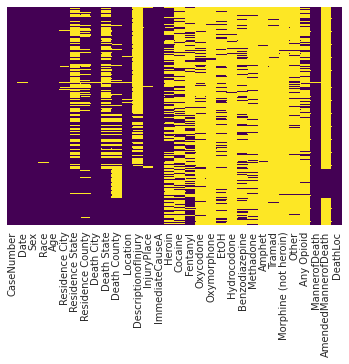

In [ ]:
# Every yellow line indicates true (meaning where there are null values)

sns.heatmap(DA.isnull(), yticklabels=False,cbar=False,cmap='viridis')

**** From the plot above, we can visually see that we have a few null values in the "Age", "InjuryPlace" and "Sex" coloumn and a lot more null values in coloumn of drugs like "Amphet", "Tramad", "Oxymorphone", hence decision needs to be made on how to deal with them. The coloumns with more null values may be excluded  entirely from this analysis, since they are not the column of interest or I create dummy values (zero for no information of such coloumn or 1 for having an information for such drug coloumn). Also, I can decide to use an aggregate of the ages to fix the missing ages. Or exclude the rows that have missing "Ages". For the "Sex", I can decide to use the most common variable or ignore the rows with missing values, and same for "InjuryPlace"

# **Exploratory Data Analysis**

Visualizing the gender that is most affected by drug abuse

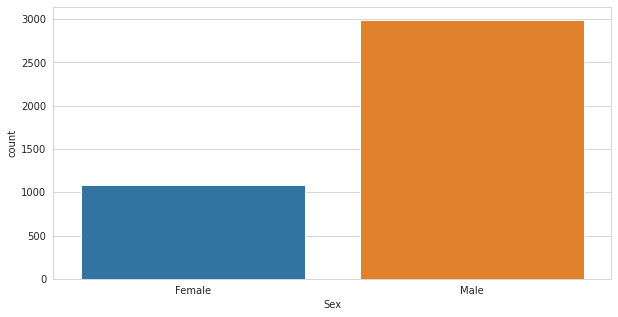

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=DA)

Visualizing the most affected gender across different races

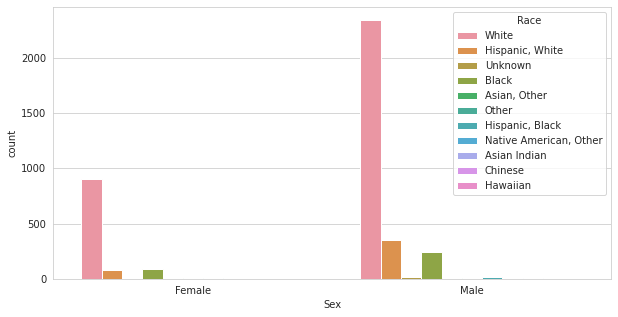

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',hue='Race',data=DA)

Age distribution of affected people across different races

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

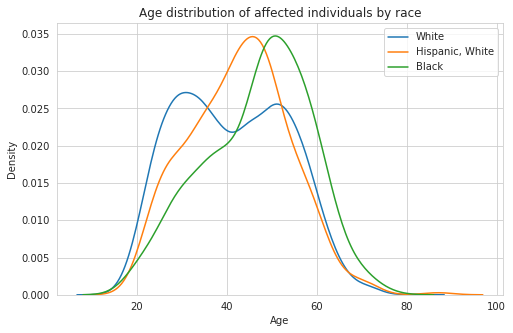

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=[8, 5])
for Race in DA['Race'].unique():
    if sum(DA['Race'] == Race) > 100:
        sns.distplot(DA.loc[DA['Race'] == Race, 'Age'], hist=False, label=Race, ax=ax)
ax.set_title('Age distribution of affected individuals by race')
ax.autoscale()
ax.legend()
plt.show()

Age grouping;

Because of the large range of ages on the data, the age would be grouped


In [ ]:
# Grouping the ages in ranges of "10-19" "20-29" "30-39" "40-49" "50-59" "60-69" "70-79" "80+"
bins = [10, 20, 30, 40, 50, 60, 70, 80, np.inf]
names = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

DA['Age Group'] = pd.cut(DA['Age'], bins, labels=names)

print(DA.dtypes)
DA.head()



CaseNumber                 object
Date                       object
Sex                        object
Race                       object
Age                       float64
Residence City             object
Residence State            object
Residence County           object
Death City                 object
Death State                object
Death County               object
Location                   object
DescriptionofInjury        object
InjuryPlace                object
ImmediateCauseA            object
Heroin                     object
Cocaine                    object
Fentanyl                   object
Oxycodone                  object
Oxymorphone                object
EtOH                       object
Hydrocodone                object
Benzodiazepine             object
Methadone                  object
Amphet                     object
Tramad                     object
Morphine (not heroin)      object
Other                      object
Any Opioid                 object
MannerofDeath 

,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,...,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc,Age Group
0,13-16336,11/09/2013,Female,White,53.0,GROTON,NaN,NEW LONDON,GROTON,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"GROTON, CT\n(41.343693, -72.07877)",50-59
1,12-18447,12/29/2012,Male,White,30.0,WOLCOTT,NaN,NEW HAVEN,WATERBURY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WATERBURY, CT\n(41.554261, -73.043069)",20-29
2,14-2758,02/18/2014,Male,White,43.0,ENFIELD,NaN,NaN,ENFIELD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)",40-49
3,14-13497,09/07/2014,Female,White,24.0,WALLINGFORD,NaN,NaN,WALLINGFORD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WALLINGFORD, CT\n(41.454408, -72.818414)",20-29
4,13-14421,10/04/2013,Female,White,26.0,WEST HAVEN,NaN,NEW HAVEN,WEST HAVEN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WEST HAVEN, CT\n(41.272336, -72.949817)",20-29


Visualization of the affected age groups

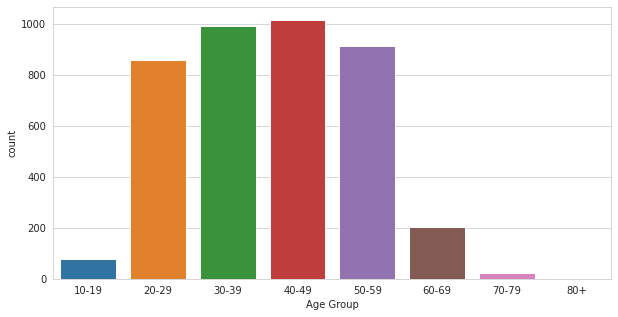

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age Group',data=DA)

Visualization of the affected age groups for both genders

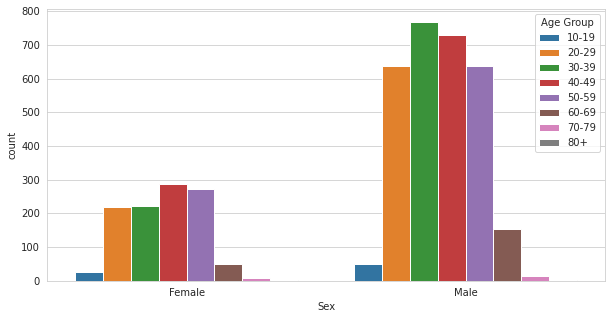

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',hue='Age Group',data=DA)

Visualization of death from drug abuse between 2012 and 2017

In [ ]:
DA['Date'] = pd.to_datetime(DA['Date'], infer_datetime_format=True)
DA['Year'] = DA['Date'].dt.year
DA['Year_month'] = DA['Date'].dt.to_period('M')

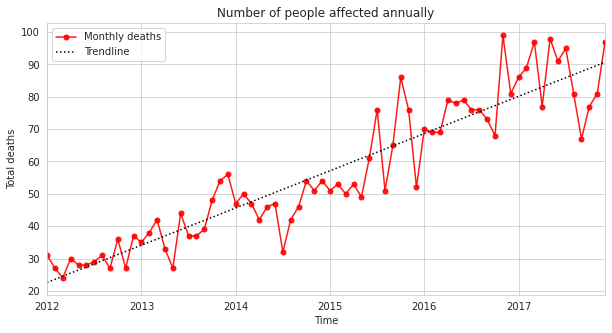

In [ ]:
annual_deaths = DA.groupby('Year_month')['Date'].count()

fig, ax = plt.subplots(1, 1, figsize=[10, 5])
lr = LinearRegression().fit(pd.to_numeric(annual_deaths.index).values.reshape(-1, 1),
                            annual_deaths.values.reshape(-1, 1))
trendline = lr.predict(pd.to_numeric(annual_deaths.index).values.reshape(-1, 1))
annual_deaths.plot(ax=ax, marker='o', ls='-', alpha=.9, markersize=5, color='r', label='Monthly deaths')
ax.plot(annual_deaths.index, trendline, ls=':', color='k', label='Trendline')
ax.set_ylabel('Total deaths')
ax.set_xlabel('Time')
ax.set_title('Number of people affected annually')
ax.legend()
plt.show()

### *** From the above plots, it can be said that the menace is getting worse by the years while it is common in the male gender than the female gender. However, age group most affected differs to gender. To predict the chances of getting to a hospital in the case of intoxication, further analysis on this data would be done, exploring KNN and Decision Tree machine learning algorithm.

# **Data Preprocessing**

Data Cleaning & Transformation

In [ ]:
DA.head()

,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,...,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc,Age Group,Year,Year_month
0,13-16336,2013-11-09,Female,White,53.0,GROTON,NaN,NEW LONDON,GROTON,NaN,...,NaN,NaN,NaN,NaN,Accident,NaN,"GROTON, CT\n(41.343693, -72.07877)",50-59,2013.0,2013-11
1,12-18447,2012-12-29,Male,White,30.0,WOLCOTT,NaN,NEW HAVEN,WATERBURY,NaN,...,NaN,NaN,NaN,NaN,Accident,NaN,"WATERBURY, CT\n(41.554261, -73.043069)",20-29,2012.0,2012-12
2,14-2758,2014-02-18,Male,White,43.0,ENFIELD,NaN,NaN,ENFIELD,NaN,...,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)",40-49,2014.0,2014-02
3,14-13497,2014-09-07,Female,White,24.0,WALLINGFORD,NaN,NaN,WALLINGFORD,NaN,...,NaN,NaN,NaN,NaN,Accident,NaN,"WALLINGFORD, CT\n(41.454408, -72.818414)",20-29,2014.0,2014-09
4,13-14421,2013-10-04,Female,White,26.0,WEST HAVEN,NaN,NEW HAVEN,WEST HAVEN,NaN,...,NaN,NaN,NaN,NaN,Accident,NaN,"WEST HAVEN, CT\n(41.272336, -72.949817)",20-29,2013.0,2013-10


Redefining the dataframe into the only needed variables

In [ ]:
DA = DA[['Date', 'Sex', 'Race', 'Age', 'Age Group', 'InjuryPlace', 'Location', 'Year', 'Year_month']]
DA.head()

,Date,Sex,Race,Age,Age Group,InjuryPlace,Location,Year,Year_month
0,2013-11-09,Female,White,53.0,50-59,NaN,Residence,2013.0,2013-11
1,2012-12-29,Male,White,30.0,20-29,Residence,Hospital,2012.0,2012-12
2,2014-02-18,Male,White,43.0,40-49,Residence,Residence,2014.0,2014-02
3,2014-09-07,Female,White,24.0,20-29,Residence,Residence,2014.0,2014-09
4,2013-10-04,Female,White,26.0,20-29,Residential Building,Other,2013.0,2013-10


Dropping of the rows with missing values

In [ ]:
DA.isna().sum()

Date            2
Sex             4
Race           11
Age             2
Age Group       2
InjuryPlace    79
Location       22
Year            2
Year_month      2
dtype: int64

In [ ]:
DA.dropna(subset=['Date', 'Sex', 'Race', 'Age', 'Age Group', 'InjuryPlace', 'Location', 'Year', 'Year_month'],axis=0,inplace=True)
DA.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Date           0
Sex            0
Race           0
Age            0
Age Group      0
InjuryPlace    0
Location       0
Year           0
Year_month     0
dtype: int64

In [ ]:
DA.info

<bound method DataFrame.info of            Date     Sex             Race   Age Age Group  \
1    2012-12-29    Male            White  30.0     20-29   
2    2014-02-18    Male            White  43.0     40-49   
3    2014-09-07  Female            White  24.0     20-29   
4    2013-10-04  Female            White  26.0     20-29   
5    2013-12-10  Female            White  45.0     40-49   
...         ...     ...              ...   ...       ...   
4076 2017-07-24    Male  Hispanic, White  31.0     30-39   
4077 2017-08-12  Female  Hispanic, White  46.0     40-49   
4078 2017-07-24    Male          Unknown  32.0     30-39   
4079 2017-11-17    Male            White  27.0     20-29   
4080 2017-12-19  Female            White  24.0     20-29   

               InjuryPlace   Location    Year Year_month  
1                Residence   Hospital  2012.0    2012-12  
2                Residence  Residence  2014.0    2014-02  
3                Residence  Residence  2014.0    2014-09  
4     Resid

In [ ]:
DA.head()


,Date,Sex,Race,Age,Age Group,InjuryPlace,Location,Year,Year_month
1,2012-12-29,Male,White,30.0,20-29,Residence,Hospital,2012.0,2012-12
2,2014-02-18,Male,White,43.0,40-49,Residence,Residence,2014.0,2014-02
3,2014-09-07,Female,White,24.0,20-29,Residence,Residence,2014.0,2014-09
4,2013-10-04,Female,White,26.0,20-29,Residential Building,Other,2013.0,2013-10
5,2013-12-10,Female,White,45.0,40-49,Residence,Hospital,2013.0,2013-12


Since the analytical question is interested in calling out the number of people that were able to make it to the hospital, the rows which records abusers/misusers having their intoxication episode take place within the hospital environment will also be taken off the "InjuryPlace" column

In [ ]:
DA=DA[DA['InjuryPlace']!= 'Hospital']
DA.info

<bound method DataFrame.info of            Date     Sex             Race   Age Age Group  \
1    2012-12-29    Male            White  30.0     20-29   
2    2014-02-18    Male            White  43.0     40-49   
3    2014-09-07  Female            White  24.0     20-29   
4    2013-10-04  Female            White  26.0     20-29   
5    2013-12-10  Female            White  45.0     40-49   
...         ...     ...              ...   ...       ...   
4076 2017-07-24    Male  Hispanic, White  31.0     30-39   
4077 2017-08-12  Female  Hispanic, White  46.0     40-49   
4078 2017-07-24    Male          Unknown  32.0     30-39   
4079 2017-11-17    Male            White  27.0     20-29   
4080 2017-12-19  Female            White  24.0     20-29   

               InjuryPlace   Location    Year Year_month  
1                Residence   Hospital  2012.0    2012-12  
2                Residence  Residence  2014.0    2014-02  
3                Residence  Residence  2014.0    2014-09  
4     Resid

# **Statistical/Computational-based Data Analytics**

Because of the nature of the data being explored, KNN would be utilized for this purpose and Decision Tree would double to confirm the model`s accuracy

In [ ]:
DA

,Date,Sex,Race,Age,Age Group,InjuryPlace,Location,Year,Year_month
1,2012-12-29,Male,White,30.0,20-29,Residence,Hospital,2012.0,2012-12
2,2014-02-18,Male,White,43.0,40-49,Residence,Residence,2014.0,2014-02
3,2014-09-07,Female,White,24.0,20-29,Residence,Residence,2014.0,2014-09
4,2013-10-04,Female,White,26.0,20-29,Residential Building,Other,2013.0,2013-10
5,2013-12-10,Female,White,45.0,40-49,Residence,Hospital,2013.0,2013-12
...,...,...,...,...,...,...,...,...,...
4076,2017-07-24,Male,"Hispanic, White",31.0,30-39,Automobile,Other,2017.0,2017-07
4077,2017-08-12,Female,"Hispanic, White",46.0,40-49,House,Hospital,2017.0,2017-08
4078,2017-07-24,Male,Unknown,32.0,30-39,Residence,Hospital,2017.0,2017-07
4079,2017-11-17,Male,White,27.0,20-29,Residence,Residence,2017.0,2017-11


Defining the axis X and Y variables

In [ ]:


X = DA[['Sex','Age', 'InjuryPlace']] .values

X[0:5]

array([['Male', 30.0, 'Residence'],
       ['Male', 43.0, 'Residence'],
       ['Female', 24.0, 'Residence'],
       ['Female', 26.0, 'Residential Building'],
       ['Female', 45.0, 'Residence']], dtype=object)

Restructuring the records of "InjuryPlace" to clean up the repititions, similarities and leave us with the important category of places intoxication took place

In [ ]:
location = ['Residence', 'Other', 'Automobile', 'Residential Building', 'Unknown', 'Hotel or Motel', 'Other indoor Area', 'Other Industrial Area', 'Restaurant', 'Office Building', 'Store or Shopping Area', 'Other Public Buildings']



places = pd.DataFrame(location, columns =['location'])

places

,location
0,Residence
1,Other
2,Automobile
3,Residential Building
4,Unknown
5,Hotel or Motel
6,Other indoor Area
7,Other Industrial Area
8,Restaurant
9,Office Building


In [ ]:
DA=DA[DA['InjuryPlace'].isin(places['location'])]


In [ ]:
DA

,Date,Sex,Race,Age,Age Group,InjuryPlace,Location,Year,Year_month
1,2012-12-29,Male,White,30.0,20-29,Residence,Hospital,2012.0,2012-12
2,2014-02-18,Male,White,43.0,40-49,Residence,Residence,2014.0,2014-02
3,2014-09-07,Female,White,24.0,20-29,Residence,Residence,2014.0,2014-09
4,2013-10-04,Female,White,26.0,20-29,Residential Building,Other,2013.0,2013-10
5,2013-12-10,Female,White,45.0,40-49,Residence,Hospital,2013.0,2013-12
...,...,...,...,...,...,...,...,...,...
4075,2017-08-20,Male,White,35.0,30-39,Residence,Hospital,2017.0,2017-08
4076,2017-07-24,Male,"Hispanic, White",31.0,30-39,Automobile,Other,2017.0,2017-07
4078,2017-07-24,Male,Unknown,32.0,30-39,Residence,Hospital,2017.0,2017-07
4079,2017-11-17,Male,White,27.0,20-29,Residence,Residence,2017.0,2017-11


Converting strings in the column of interest, "Sex" & "InjuryPlace" to numeric values

In [ ]:
DA.Sex[DA.Sex == 'Male'] = 1
DA.Sex[DA.Sex == 'Female'] = 2

DA.InjuryPlace[DA.InjuryPlace == 'Residence'] = 1
DA.InjuryPlace[DA.InjuryPlace == 'Other'] = 2
DA.InjuryPlace[DA.InjuryPlace == 'Automobile'] = 3
DA.InjuryPlace[DA.InjuryPlace == 'Residential Building'] = 4
DA.InjuryPlace[DA.InjuryPlace == 'Unknown'] = 5
DA.InjuryPlace[DA.InjuryPlace == 'Hotel or Motel'] = 6
DA.InjuryPlace[DA.InjuryPlace == 'Other indoor Area'] = 7
DA.InjuryPlace[DA.InjuryPlace == 'Restaurant'] = 8
DA.InjuryPlace[DA.InjuryPlace == 'Office Building'] = 9
DA.InjuryPlace[DA.InjuryPlace == 'Store or Shopping Area'] = 10
DA.InjuryPlace[DA.InjuryPlace == 'Other Public Buildings'] = 11


DA.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/pytho

,Date,Sex,Race,Age,Age Group,InjuryPlace,Location,Year,Year_month
1,2012-12-29,1,White,30.0,20-29,1,Hospital,2012.0,2012-12
2,2014-02-18,1,White,43.0,40-49,1,Residence,2014.0,2014-02
3,2014-09-07,2,White,24.0,20-29,1,Residence,2014.0,2014-09
4,2013-10-04,2,White,26.0,20-29,4,Other,2013.0,2013-10
5,2013-12-10,2,White,45.0,40-49,1,Hospital,2013.0,2013-12


In [ ]:
#Redifining the X axis after transformation
X = DA[['Sex', 'Age', 'InjuryPlace']] .values

X[0:5]

array([[1, 30.0, 1],
       [1, 43.0, 1],
       [2, 24.0, 1],
       [2, 26.0, 4],
       [2, 45.0, 1]], dtype=object)

In [ ]:
#Defining the y axis
y = DA['Location'].values
y[0:5]

array(['Hospital', 'Residence', 'Residence', 'Other', 'Hospital'],
      dtype=object)

Converting strings in the column of interest, "Location" to numeric values

In [ ]:
#Itemizing the different location of death on the column "Location"
dp = ['Residence', 'Other', 'Hospital']



places = pd.DataFrame(dp, columns =['dp'])

places

,dp
0,Residence
1,Other
2,Hospital


In [ ]:
DA=DA[DA['Location'].isin(places['dp'])]

In [ ]:
#Converting the "Location" values to numeric values
DA.Location[DA.Location == 'Residence'] = 1
DA.Location[DA.Location == 'Other'] = 2
DA.Location[DA.Location == 'Hospital'] = 3
DA.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing im

,Date,Sex,Race,Age,Age Group,InjuryPlace,Location,Year,Year_month
1,2012-12-29,1,White,30.0,20-29,1,3,2012.0,2012-12
2,2014-02-18,1,White,43.0,40-49,1,1,2014.0,2014-02
3,2014-09-07,2,White,24.0,20-29,1,1,2014.0,2014-09
4,2013-10-04,2,White,26.0,20-29,4,2,2013.0,2013-10
5,2013-12-10,2,White,45.0,40-49,1,3,2013.0,2013-12


In [ ]:
#convert the integers "Sex", "InjuryPlace" & "Location" to float so as to be consistent with the "Age":
DA['Sex']=DA['Sex'].astype(float).values

DA['Age']=DA['Age'].astype(float).values

DA['InjuryPlace']=DA['InjuryPlace'].astype(float).values

DA['Location']=DA['Location'].astype(float).values



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:

X = DA[['Sex','Age', 'InjuryPlace']] .values

X[0:5]

array([[ 1., 30.,  1.],
       [ 1., 43.,  1.],
       [ 2., 24.,  1.],
       [ 2., 26.,  4.],
       [ 2., 45.,  1.]])

In [ ]:


X = DA[['Sex','Age', 'InjuryPlace']]


In [ ]:
y = DA[['Location']]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613 entries, 1 to 4080
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          3613 non-null   float64
 1   Age          3613 non-null   float64
 2   InjuryPlace  3613 non-null   float64
dtypes: float64(3)
memory usage: 112.9 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613 entries, 1 to 4080
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  3613 non-null   float64
dtypes: float64(1)
memory usage: 56.5 KB


**Standardization of the data**

In [ ]:

X=stats.zscore(X)


## **** **Modelling**

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2890, 3) (2890, 1)
Test set: (723, 3) (723, 1)


**Machine Learning; Using KNN Classification model based on the peculiarity of the dataset DA**

Training of the model

In [ ]:
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Predicition of where abusers/misusers will likely die after an episode of intoxication.

Having "1" as Residence
        "2" as Other
        "3" as Hospital

In [ ]:
yhat = neigh.predict(X_test)
yhat [0:50]

array([1., 2., 1., 1., 1., 2., 1., 3., 3., 1., 1., 1., 3., 2., 3., 1., 3.,
       1., 1., 1., 1., 1., 1., 2., 3., 1., 1., 1., 1., 2., 1., 2., 3., 1.,
       1., 2., 2., 1., 1., 1., 1., 2., 1., 3., 2., 1., 1., 1., 1., 1.])

In [ ]:
#Identifying the Unique outcomes of yhat
x = np.array(yhat)
print(np.unique(x))

[1. 2. 3.]


Counting the number of intoxicated abusers/misusers that made it to the Hospital (3.0)

In [ ]:
import collections
collections.Counter(x)


Counter({1.0: 548, 2.0: 110, 3.0: 65})

In [ ]:
print(len(x))

723


Accuracy of the Model Evaluation

In [ ]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.6459197786998617


In [ ]:
#Varying the value of K to confirm model accuracy
Ks = 7
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


mean_acc

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

array([0.51590595, 0.64315353, 0.61549101, 0.64591978, 0.62793914,
       0.6417704 ])

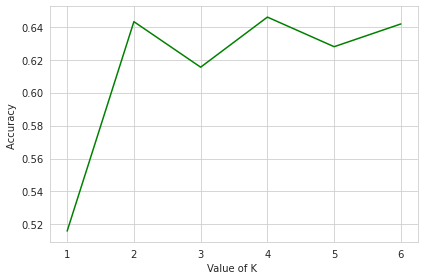

In [ ]:
#Plotting an accuracy graph
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Value of K ')
plt.tight_layout()
plt.show()

**Machine Learning; Using Decision Tree Classification model as an alternative to validate prediction**

In [ ]:
#Filling the target variable
y = DA["Location"]
y[0:5]

1    3.0
2    1.0
3    1.0
4    2.0
5    3.0
Name: Location, dtype: float64

Setting up DecisionTree

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3)

## Modeling of the Decision Tree
 <b>DecisionTreeClassifier</b> called <b>Hx</b>.<br> was first created


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Hx = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
#Fitting the data with the training feature matrix X_trainset and training response vector y_trainset
Hx.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Prediction

In [ ]:
predTree = Hx.predict(X_testset)
predTree [0:5]

array([1., 2., 1., 1., 2.])

In [ ]:

collections.Counter(predTree)

Counter({1.0: 847, 2.0: 198, 3.0: 39})

Accuracy Evaluation

In [ ]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6826568265682657
